In [1]:
import time
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

%matplotlib inline
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70., Om0=0.3)
import pandas as pd

In [14]:
def load_cubes(fileseq, snap, fits_name, fib_size=0.79, style='star_age', tauv=1.0, mu=0.3,  with_metal=True,
                 cir_fib=True,with_PSF=True, faceon=False, one_comp_dust=False):
    
    #cube_dir=datacube_dir(fileseq, snap, cell_size=fib_size,
    #             style=style,  with_metal=with_metal,
    #             cir_fib=True,with_PSF=with_PSF )
    cube_dir = '../snap'+str(snap)+'/'
    if with_PSF == True:
        cube_dir += 'with_PSF/'
    else: cube_dir += 'no_PSF/'

    fits_outstr = "_tauv%0.1f_mu%0.1f" %(tauv, mu)
    datacube_fits = cube_dir+fits_name
#     print datacube_fits
    wave = fits.getdata(datacube_fits, extname="WAVELENGTH")['wave']
    cube_tau = fits.getdata(datacube_fits, extname="DATACUBE_DUSTTED")
    cube_notau = fits.getdata(datacube_fits, extname="DATACUBE_NODUST")
    return wave, cube_tau, cube_notau

In [67]:
# simulation
fileseq = '2xSc_07_EC_BH_vw1e4_ReposNoRFBNoRP'
remarks = '_SNR15'
snap = '119_uniformZ'
fits_name = 'DataCube_2xSc_07_EC_BH_vw1e4_ReposNoRFBNoRP_tauv1.0_mu0.3_119_star_age.fits'
# type of the cube
style='star_age'
with_metal=True
with_PSF=True

# type of the spectrum
dust = True
noise = True
SNR = 15

In [68]:
# paramters
kpc_in_arcsec = 0.79134391 # 1 arcsec is corresponding to 0.8 kpc at z=0.04
fib_size = 0.79134391 # as its radius is 1 arcsec
pixel_size = 0.5 * kpc_in_arcsec # in side length in kpc
print("size of the a pixel: %.3f kpc" %pixel_size)
print("size of the a pixel: %.3f kpc" %pixel_size)
print("size of the a pixel: %.3f kpc" %pixel_size)

size of the a pixel: 0.396 kpc
size of the a pixel: 0.396 kpc
size of the a pixel: 0.396 kpc


In [69]:
# loading the cube
wave, cube_tau, cube_notau = load_cubes(fileseq, snap, fits_name, fib_size=fib_size, style=style,
                        with_metal=with_metal, cir_fib=True,with_PSF=with_PSF)

Text(0, 0.5, 'y[pixel]')

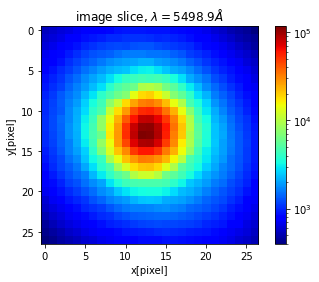

In [70]:
idx = 8441
plt.imshow(cube_notau[idx], norm=LogNorm(), cmap='jet')
plt.colorbar()
plt.title( r"image slice, $\lambda=%.1f\AA$" %wave[idx]  )
plt.xlabel('x[pixel]')
plt.ylabel('y[pixel]')

Text(0, 0.5, 'Luminosity[$L_\\odot/\\AA$]')

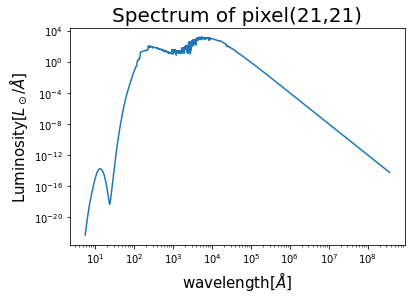

In [71]:
plt.plot(wave, cube_notau[:, 21,21])
plt.xscale('log')
plt.yscale('log')
plt.title("Spectrum of pixel(21,21)", fontsize=20)
plt.xlabel('wavelength[$\AA$]', fontsize=15)
plt.ylabel('Luminosity[$L_\odot/\AA$]', fontsize=15)

Text(0, 0.5, 'Luminosity[$L_\\odot/\\AA$]')

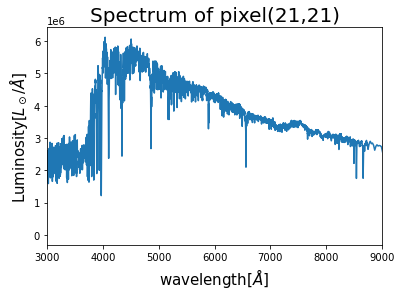

In [72]:
plt.plot(wave, np.sum(cube_notau,axis=(1,2)))
plt.xlim(3000,9000)
plt.title("Spectrum of pixel(21,21)", fontsize=20)
plt.xlabel('wavelength[$\AA$]', fontsize=15)
plt.ylabel('Luminosity[$L_\odot/\AA$]', fontsize=15)

In [73]:
# load in the original simulated Z datacube, to check if there is differences between this one and the original
snap_original = 119
fits_name_original = 'DataCube_2xSc_07_EC_BH_vw1e4_ReposNoRFBNoRP_tauv1.0_mu0.3_119star_age.fits'

wave_, cube_tau_, cube_notau_ = load_cubes(fileseq, snap_original, fits_name_original, fib_size=fib_size, style=style,
                        with_metal=with_metal, cir_fib=True,with_PSF=with_PSF)

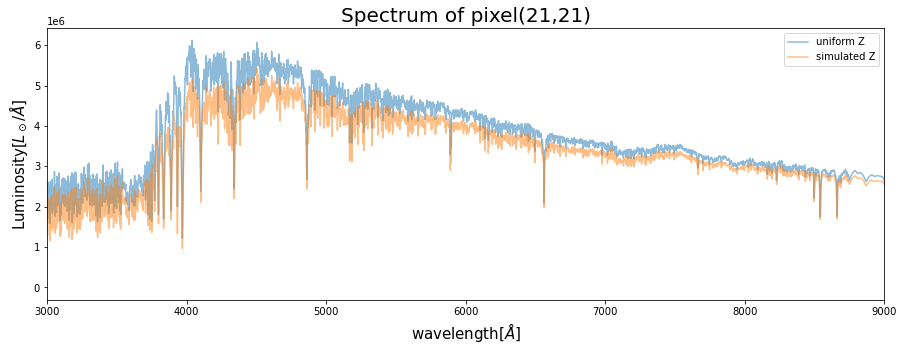

In [74]:
fig, ax = plt.subplots(figsize=[15,5])
ax.plot(wave, np.sum(cube_notau,axis=(1,2)), alpha=0.5, label='uniform Z')
ax.plot(wave_, np.sum(cube_notau_,axis=(1,2)), alpha=0.5, label='simulated Z')
ax.set_xlim(3000,9000)
ax.set_title("Spectrum of pixel(21,21)", fontsize=20)
ax.set_xlabel('wavelength[$\AA$]', fontsize=15)
ax.set_ylabel('Luminosity[$L_\odot/\AA$]', fontsize=15)
ax.legend()
plt.show()

In [75]:
def plot_spectrum(wave, lum_spectrum, z=0.04, plot=True):
    obs_wave = wave*(1+z)  # converting wavelengths from rest frame to observed
    # 3.826*10**33 = 1 Lsun in erg s^-1
    # cosmo.luminosity_distance(0.04).value gives distance in Mpc at z=0.04, multiply by 1000 to get kpc
    # 3.0856*10**21 = 1 kpc in cm
    # equation is Spectral energy = luminosity * (Lsun in erg s ^-1) / 4 pi (r in cm)**2
    spectrum = lum_spectrum*3.826*10**33/(4*np.pi*((cosmo.luminosity_distance(0.04).value*1000)*(3.0856*10**21))**2)
    if plot==True:
        plt.plot(obs_wave, spectrum*10**18)
        plt.xlim(3000,10000)
        #plt.xscale('log')
        #plt.yscale('log')
        plt.xlabel('wavelength[$\AA$]', fontsize=15)
        plt.ylabel('$f_\lambda \;/\; 10^{-18} \;erg\;s^{-1}\;cm^{-2}\;\AA^{-1}$', fontsize=15)
        plt.show()
    return obs_wave, spectrum

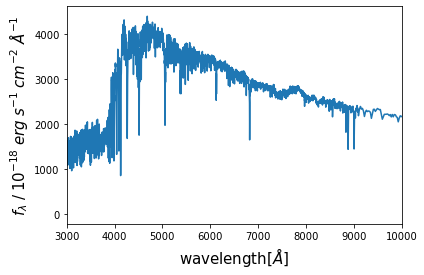

In [76]:
if dust == True:
    cubecube = cube_tau.copy()
else: cubecube = cube_notau.copy()
z_wave, spectrum = plot_spectrum(wave, np.sum(cubecube,axis=(1,2)),z=0.04)

In [77]:
def gen_save_name(fileseq, snap, with_PSF, with_dust, with_noise, remarks=None):
    directory = '../snap'+str(snap)+'/'
    save_name = 'Spectrum_'+fileseq+'_uniformZ'
    if with_PSF == True:
        directory += 'with_PSF/'
        save_name += '_with_PSF'
    else:
        directory += 'no_PSF/'
        save_name += '_no_PSF'
    if with_dust == True:
        directory += 'with_dust/'
        save_name += '_with_dust'
    else:
        directory += 'no_dust/'
        save_name += '_no_dust'
    if with_noise == True:
        save_name += '_with_noise'
    if remarks is not None:
        if remarks[0] == '_':
            save_name += remarks
        else: save_name += '_'+remarks
    save_name += '.csv'
    return directory+save_name

def noise_and_error(spectrum, SNR, noise):
    #setting spectrum obs error to be 15% of flux density
    spectrum_err = spectrum/SNR
    
    if noise == True:
        #adding artificial noise to the spectrum according to the SNR set
        #noise added is gaussian with sigma = signal/SNR
        spectrum_1sigma = spectrum/SNR
        spectrum_ = spectrum+np.random.randn(len(spectrum_1sigma))*spectrum_1sigma
    else:
        spectrum_ = spectrum
    return spectrum_, spectrum_err

spectrum_, spectrum_err = noise_and_error(spectrum, SNR, noise)

save_df = pd.DataFrame({'observed-wave[AA]':z_wave,'flux[10^-16 erg/s/cm^2/AA]':spectrum_*10**16, 'noise[10^-16 erg/s/cm^2/AA]':spectrum_err*10**16})
save_name = gen_save_name(fileseq, snap, with_PSF, dust, noise, remarks=remarks)
print(save_name)
save_df[save_df['observed-wave[AA]'].between(3000,10000)].to_csv(save_name, index=False)

../snap119_uniformZ/with_PSF/with_dust/Spectrum_2xSc_07_EC_BH_vw1e4_ReposNoRFBNoRP_uniformZ_with_PSF_with_dust_with_noise_SNR15.csv
